In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import logging, os
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)
# logging.basicConfig(level=logging.DEBUG)

BASE_PATH = "../../../../../local_data/practice/"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"map_error2/"
os.system("mkdir -p " + OUTPUT_PATH)

(train_ds, validation_ds), metadata= tfds.load(
    "cats_vs_dogs",
    data_dir=DATA_PATH,
    split=["train[:40%]", "train[40%:50%]"],
    with_info=True,
    as_supervised=True, 
)# Include labels

INFO:absl:Load dataset info from ../../../../../local_data/tfds/cats_vs_dogs/4.0.0
INFO:absl:Reusing dataset cats_vs_dogs (../../../../../local_data/tfds/cats_vs_dogs/4.0.0)
INFO:absl:Constructing tf.data.Dataset cats_vs_dogs for split ['train[:40%]', 'train[40%:50%]'], from ../../../../../local_data/tfds/cats_vs_dogs/4.0.0


In [3]:
num_train = tf.data.experimental.cardinality(train_ds)
num_test = tf.data.experimental.cardinality(validation_ds)
print(f"Number of training samples: {num_train}")
print(f"Number of validation samples: {num_test}")
print("train_ds",train_ds)

Number of training samples: 9305
Number of validation samples: 2326
train_ds <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


,image,label
0,,1 (dog)
1,,1 (dog)

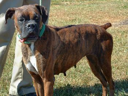
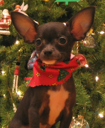

In [4]:
tfds.as_dataframe(train_ds.take(2), metadata)

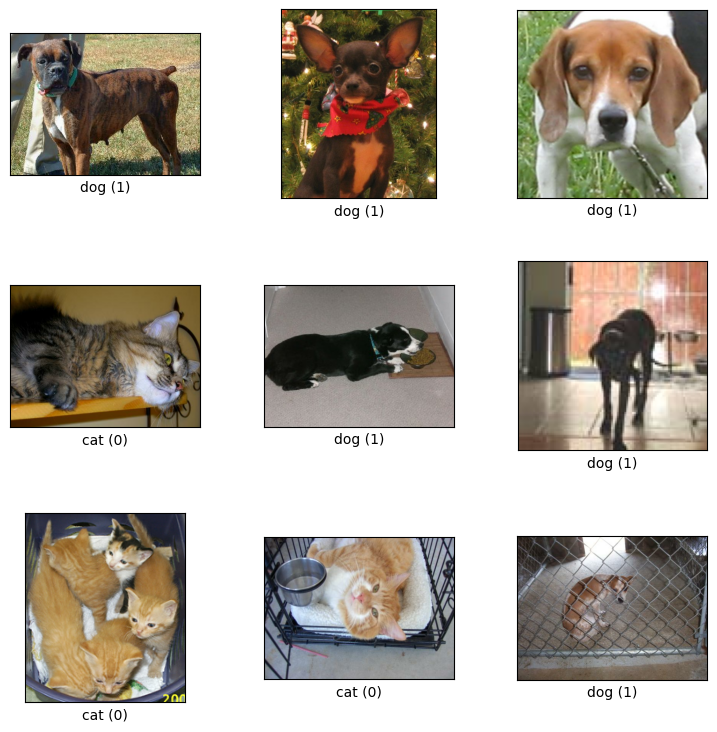

In [5]:
fig = tfds.show_examples(train_ds, metadata)

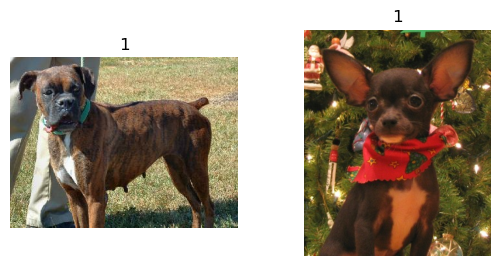

In [6]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(2)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [7]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [8]:
num_train = tf.data.experimental.cardinality(train_ds)
num_test = tf.data.experimental.cardinality(validation_ds)
print(f"Number of training samples: {num_train}")
print(f"Number of validation samples: {num_test}")
print("train_ds",train_ds)

Number of training samples: 9305
Number of validation samples: 2326
train_ds <_MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [9]:
tfds.as_dataframe(train_ds.take(2), metadata)

TypeError: HTML formatting of column image failed:
 * feature: Image(shape=(None, None, 3), dtype=uint8)
 * input: array([[[239.92    , 245.92    , 245.92    ],
        [240.13333 , 244.13333 , 243.13333 ],
        [184.62224 , 186.2889  , 182.62224 ],
        ...,
        [216.70172 , 201.11505 , 157.19952 ],
        [193.74667 , 179.74667 , 132.74667 ],
        [157.42636 , 145.67523 ,  97.550804]],

       [[237.42667 , 241.42667 , 240.42667 ],
        [224.84    , 228.96    , 227.6     ],
        [140.34668 , 142.01335 , 138.34668 ],
        ...,
        [216.49316 , 203.73315 , 158.9465  ],
        [202.08    , 189.32    , 144.2     ],
        [199.94675 , 190.85338 , 141.81339 ]],

       [[233.06667 , 235.33334 , 232.6     ],
        [185.59999 , 188.      , 184.86667 ],
        [111.200005, 112.28889 , 107.46667 ],
        ...,
        [211.4886  , 203.0886  , 157.13304 ],
        [197.53334 , 189.13333 , 142.26666 ],
        [204.77873 , 199.1787  , 151.00092 ]],

       ...,

       [[155.82217 , 149.15552 , 101.48885 ],
        [214.26682 , 212.26682 , 161.26682 ],
        [178.17786 , 181.17786 , 126.17786 ],
        ...,
        [167.22252 , 173.22258 , 147.1115  ],
        [105.866425, 105.13309 ,  74.999756],
        [195.44402 , 200.04393 , 170.3773  ]],

       [[147.94653 , 141.27986 ,  93.6132  ],
        [224.0404  , 222.0404  , 171.0404  ],
        [110.86646 , 113.86646 ,  58.866463],
        ...,
        [118.159355, 125.33276 , 102.42612 ],
        [102.51941 , 105.27942 ,  76.03943 ],
        [ 83.03984 ,  92.30647 ,  62.93316 ]],

       [[110.417496, 103.750824,  56.08416 ],
        [212.79947 , 210.79947 , 159.79947 ],
        [135.14264 , 138.14264 ,  83.14265 ],
        ...,
        [ 56.742332,  66.82684 ,  45.035778],
        [ 61.546112,  65.54611 ,  39.79947 ],
        [ 35.55925 ,  48.02146 ,  21.523708]]], dtype=float32)
Cannot handle this data type: (1, 1, 3), <f4

                                               image  label
0  [[[239.92, 245.92, 245.92], [240.13333, 244.13...      1
1  [[[207.25754, 156.01753, 105.637535], [247.596...      1

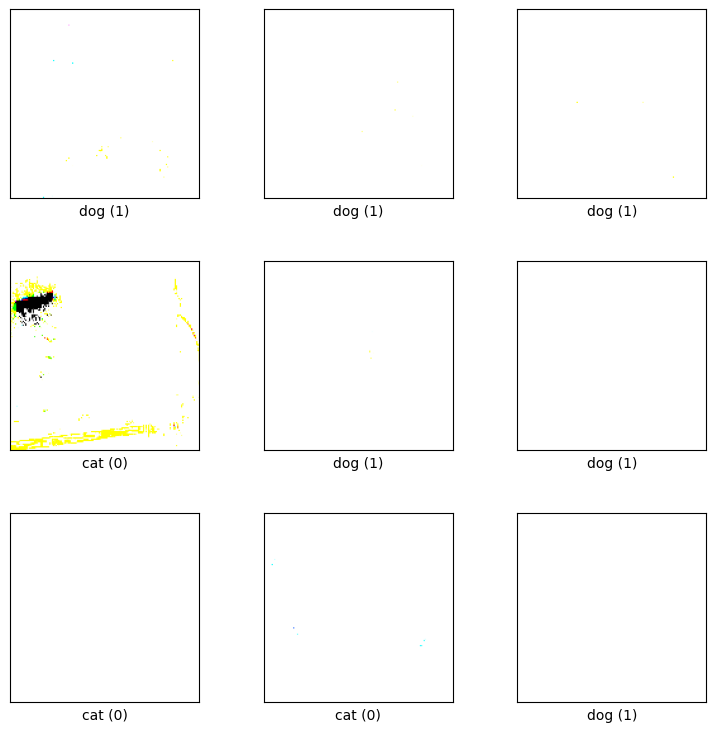

In [10]:
fig = tfds.show_examples(train_ds, metadata)

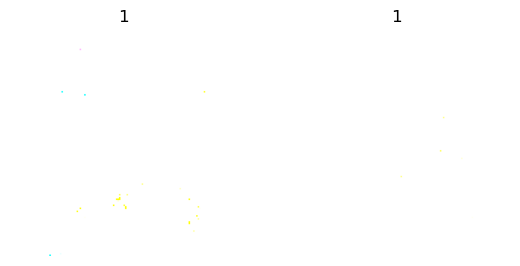

In [11]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(2)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [12]:
batch_size = 32
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache() \
.batch(batch_size).prefetch(buffer_size=10)

In [13]:
tfds.as_dataframe(train_ds.take(8), metadata)

2025-06-30 21:49:11.790881: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    # plt.imshow((image * 255).astype(np.uint8))
    plt.title(int(label))
    plt.axis("off")